In [48]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np

def t_contour(ax, df, vname, interval, extend, cblabel=None):

    pv = df.pivot(index='date_hour', columns='layer', values=vname)
    #pv = pv.resample('D', how='mean')
    date = pv.index
    depth = pv.columns
    value = pv.values.T

    cf = ax.contour(date, -depth, value, interval, extend=extend)
    cb = plt.colorbar(cf, ax=ax)
    cb.set_label(cblabel)
        
    ax.xaxis.set_major_formatter( DateFormatter('%m/%d') )
    ax.set_ylabel('depth(m)')
    ax.set_ylim(-14, 0)
    ax.set_xlim(dt.datetime(2012,8,15), dt.datetime(2012,9,1))

def main(obsfile):
    
    df = pd.read_csv(obsfile, parse_dates=[['date','hour']], na_values='*')
    
    fig, ax = plt.subplots(4,1,figsize=(14,8))
    t_contour(ax[0], df, 'temperature', np.arange(10,28.1,1), 'both', 'Temperature [degC]')
    t_contour(ax[1], df, 'salilnity', np.arange(27,32.1,0.5), 'both', 'Salinity')
    t_contour(ax[2], df, 'chlorophyll', np.arange(0,20.1,1), 'max', 'Chlorophyll [mg/m3]')
    t_contour(ax[3], df, 'DO', np.arange(0,100.1,5), 'max', 'Oxygen [%]')
    
    ax[3].set_xlabel('2012')

obsfile = '/Users/teruhisa/Dropbox/Data/obweb/db/osaka_q1.csv'
parse = lambda date, hour: dt.date
df = pd.read_csv(obsfile, index_col='date', na_values='*')
df = df['2012-08-15':'2012-09-01']

df = df[df.layer==2]
df.pct_change()
#df.columns
#df.corr()
#df.describe()
#pd.scatter_matrix(df)
#df.plot(x='hour', y='chlorophyll', kind='scatter')

#df = df[df.light_quantum>0]
#df.plot(kind='scatter', x='hour', y='chlorophyll')

TypeError: unsupported operand type(s) for /: 'str' and 'str'

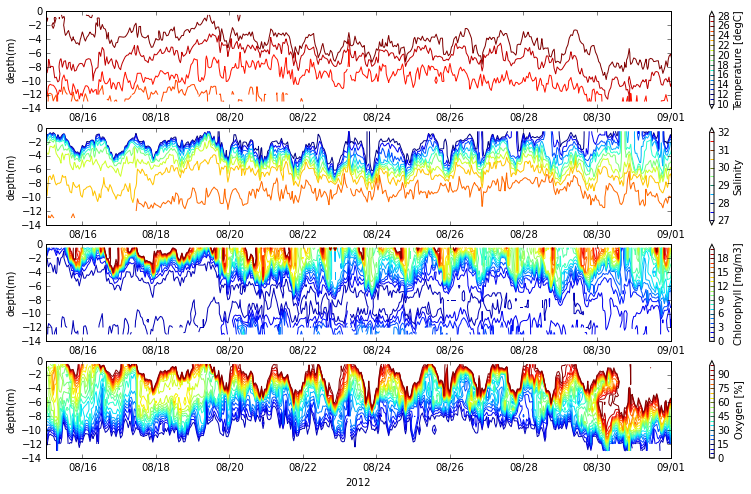

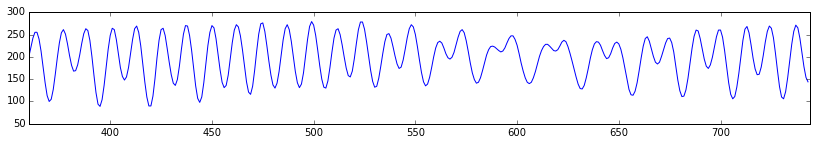

In [41]:
def test(obsfile, zetafile):
    main(obsfile)
    plt.show()
    
    df = pd.read_csv(zetafile, names=['time', 'zeta'])
    fig = plt.figure(figsize=(14,2))
    plt.plot(df.time, df.zeta)
    plt.xlim(15*24, 31*24)
    
test('/Users/teruhisa/Dropbox/Data/obweb/db/osaka_q1.csv', '/Users/teruhisa/Dropbox/Data/hry201208TK.csv')